## Catching Knifes
Value investing is one of the most powerfull strategies to implement in any portfolio. It involves buying companies that are undervalued because they arn't in favour on the wall street fashion show. Buying companies low and selling high seems simple, but it's always difficult to  buy low and having to watch it go lower first. This will dicuss some technical anaylsis methods to help navigate the buying time on a undervalued security.

In [67]:
import pandas as pd
from pandas_datareader import data as pdr

import fix_yahoo_finance as yf
yf.pdr_override()

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import numpy as np

%matplotlib inline
my_year_month_fmt = mdates.DateFormatter('%m/%y')
my_day_month_fmt = mdates.DateFormatter('%d/%m')

today = "2017-07-30"
shortTerm = "2017-07-10"   #2 weeks
midTerm = "2017-04-03"  #3 months
longTerm = "2016-07-30"  # two year

Using the market outlook notebook from earlier, as of July 27th, 2017. The Energy industry has underperformed compared to the rest market. Were going to use an excelent company named Schlumberger Limited (SLB), is a service company to oil and gas exploration/production companies , offering monitoring, imaging, and other advanced technologies to aid companies.

In [68]:
data = pdr.get_data_yahoo(['SLB', 'OIH', 'XLE', 'USO'], start=longTerm, end=today)
adjClose = data.ix['Adj Close']
volume = data.ix['Volume']

allWeekdays = pd.date_range(start=longTerm, end=today, freq='B')

adjClose = adjClose.reindex(allWeekdays).fillna(method='ffill')
volume = volume.reindex(allWeekdays).fillna(method='ffill')

[*********************100%***********************]  4 of 4 downloaded

/Users/JacobClaessens/engg3130/anaconda2/envs/learningLib/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


## Volume
One of the most powerfull tools for any technician is a stocks volume. Here we will use the volume to uncover what is actually happening with the stock.

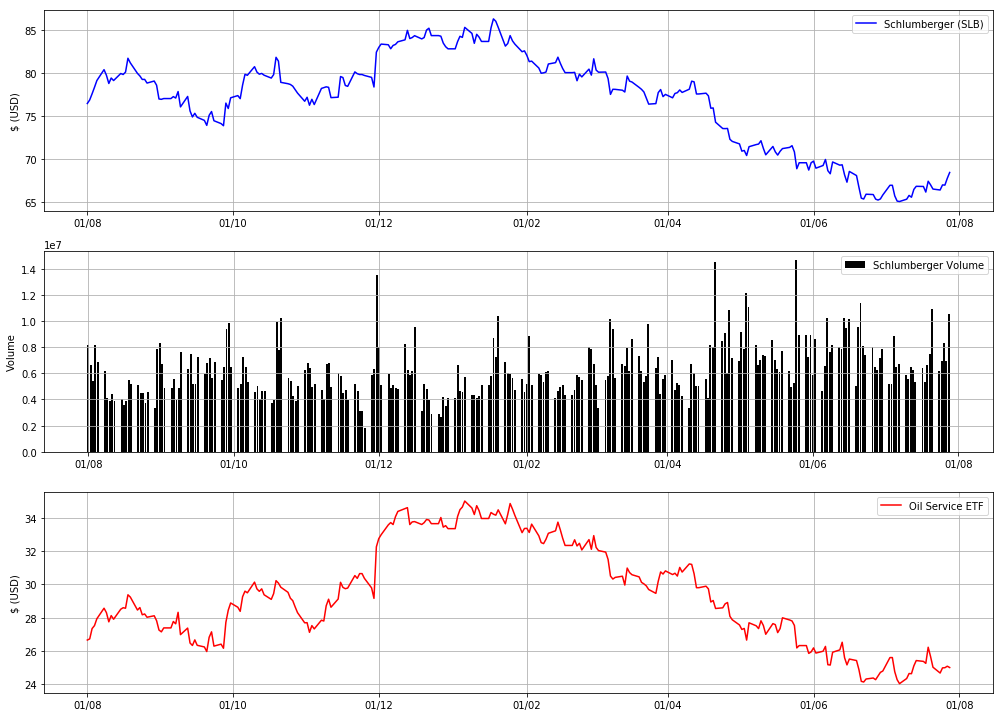

In [69]:
fig = plt.figure(figsize=(17, 17))

def formatGraph(): 
    ax.legend(loc='best')
    ax.xaxis.set_major_formatter(my_day_month_fmt)
    ax.grid()
    
ax = fig.add_subplot(4,1,1)
ax.plot(adjClose['SLB'].index, adjClose['SLB'], label='Schlumberger (SLB)', color='b')
ax.set_ylabel('$ (USD)')
formatGraph()

ax = fig.add_subplot(4,1,2)
ax.bar(volume['SLB'].index, volume['SLB'], label='Schlumberger Volume', color='black')
ax.set_ylabel('Volume')
formatGraph()

ax = fig.add_subplot(4,1,3)
ax.plot(adjClose['OIH'].index, adjClose['OIH'], label='Oil Service ETF', color='r')
ax.set_ylabel('$ (USD)')
formatGraph()

Looking above, when the company peaked on the chart, the volume was low meaning there weren't many buyers pushing that stock higher, and it was vulnerable to be taken down from bad news. That came to the sector as you'll with the OIH index, an ETF that track the performace of oil service companies. On the way down you can see massive volume spikes, these are hedge funds and mutual funds exiting there positions. Now at the bottom you can see volume is still high, but the stock is sinking. This is because at the current price buyers are stepping up to the plate and willing to buy. 
## Moving Averages
Just because a stock looks like it hit a bottom doesnt mean it nessarly a good buy time. These stocks can bounce around down here for a long time. Before you pull the trigger you can be looking for a buying signal. One of most popular is the golden crossover.

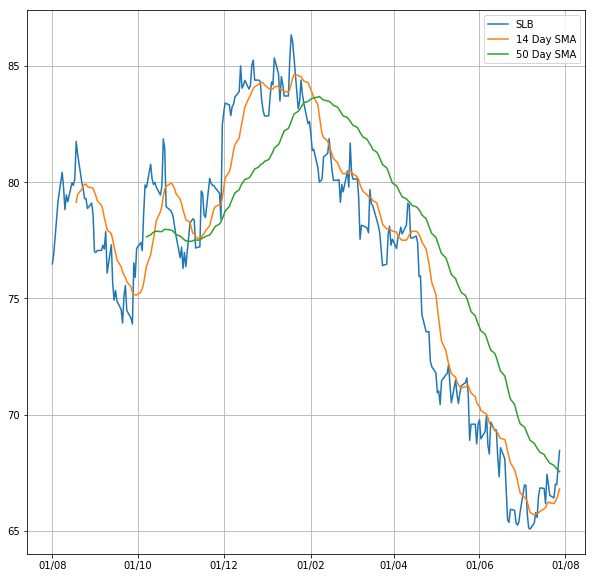

In [75]:
slb = adjClose['SLB']
shortRolling = slb.rolling(window=14).mean()
longRolling = slb.rolling(window=50).mean()
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1)
ax.plot(slb.index, slb, label='SLB')
ax.plot(shortRolling.index, shortRolling, label='14 Day SMA')
ax.plot(longRolling.index, longRolling, label='50 Day SMA')
formatGraph()

**Simple Moving Averages (SMA)** <br />
As you can see the stock appears to rise when the SMA is under the stock price, and falls when price is under the SMA. The Golden Cross is popular for technicians because its a signal that a bulls are on the horizon for stock. It occurs when the a short term moving average (ie. 14 days) crosses a long term moving average (ie. 50 days). It appears to approaching it goldan crossover soon.

There are many other indicators then just the SMA, such as the MACD, RSI, and EMA. And there are patterns that can be used, such as the head & shoulders pattern. However, fundimentals are very important to long term investors, and this investment is not a trade, so i warn about overcomplicating the technical anaylsis and devating to far from the original decision based on the fundimentals as that is what will matter over the long run. This is just to help you find a good point of entry into your investment.